In [2]:
import os
import pandas as pd

import PIL.Image
import io
from tqdm import tqdm
from torchvision import transforms
import numpy as np
import os
from datasets import Dataset, concatenate_datasets, Features, Image, Value, load_dataset, load_from_disk

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import json
import torch

/home/naman/miniconda3/envs/grounded-sam/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
ff = load_from_disk('/mnt/data1/naman/projects/storyboard_cleanup/data/storyboard_hf_dataset_chunks_54753/storyboard_hf_dataset_chunk_3')

In [37]:
len(ff)

13700

# Preprocess the dataframe(s)

In [38]:
tsv_file_path1 = "/mnt/data1/sabbih/datasets/dash-storyboards/master_data_new.tsv"
tsv_file_path2 = "/mnt/data1/naman/projects/storyboard_cleanup/data/dash-storyboards/master_data_2.tsv"

In [39]:
# Load the dataframe
df1 = pd.read_csv(tsv_file_path1, sep='\t', header=None)
df2 = pd.read_csv(tsv_file_path2, sep='\t', header=None)

In [40]:
len(df1), len(df2)

(94574, 54753)

In [41]:
df1.head()

,0,1,2,3
0,0,https://content.dashtoon.ai/stability-images/6...,https://content.dashtoon.ai/user-uploaded-imag...,"Kelly (SB2) Adult, Female, blue sleeveless min..."
1,1,https://content.dashtoon.ai/stability-images/0...,https://content.dashtoon.ai/user-uploaded-imag...,"Emily Smith Caucasian, Young Adult, Female, Bl..."
2,2,https://content.dashtoon.ai/stability-images/2...,https://content.dashtoon.ai/user-uploaded-imag...,"Dark blue sparkly stage, white curtains"
3,3,https://content.dashtoon.ai/stability-images/3...,https://content.dashtoon.ai/user-uploaded-imag...,"Kelly (SB2) Adult, Female, sleeveless blue gow..."
4,4,https://content.dashtoon.ai/stability-images/a...,https://content.dashtoon.ai/user-uploaded-imag...,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."


In [42]:
df2.head()

,0,1,2
0,https://content.dashtoon.ai/stability-images/0...,https://content.dashtoon.ai/user-uploaded-imag...,"Emily Smith Caucasian, Young Adult, Female, Bl..."
1,https://content.dashtoon.ai/stability-images/a...,https://content.dashtoon.ai/user-uploaded-imag...,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."
2,https://content.dashtoon.ai/stability-images/b...,https://content.dashtoon.ai/user-uploaded-imag...,"Grace Williams Female, Adult, Red Hair, wearin..."
3,https://content.dashtoon.ai/stability-images/8...,https://content.dashtoon.ai/user-uploaded-imag...,"Abby Misc Young Female, Eyes closed, Blonde Lo..."
4,https://content.dashtoon.ai/stability-images/5...,https://content.dashtoon.ai/user-uploaded-imag...,Grace Adult Caucasian Female with Blonde hair ...


In [43]:
df2.rename(columns = {0: 1, 1: 2, 2: 3}, inplace = True)

In [44]:
df2.head()

,1,2,3
0,https://content.dashtoon.ai/stability-images/0...,https://content.dashtoon.ai/user-uploaded-imag...,"Emily Smith Caucasian, Young Adult, Female, Bl..."
1,https://content.dashtoon.ai/stability-images/a...,https://content.dashtoon.ai/user-uploaded-imag...,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."
2,https://content.dashtoon.ai/stability-images/b...,https://content.dashtoon.ai/user-uploaded-imag...,"Grace Williams Female, Adult, Red Hair, wearin..."
3,https://content.dashtoon.ai/stability-images/8...,https://content.dashtoon.ai/user-uploaded-imag...,"Abby Misc Young Female, Eyes closed, Blonde Lo..."
4,https://content.dashtoon.ai/stability-images/5...,https://content.dashtoon.ai/user-uploaded-imag...,Grace Adult Caucasian Female with Blonde hair ...


In [45]:
df2.columns.values[:2]

array([1, 2])

In [46]:
keys = list(df2.columns.values[:2])
i1 = df1.set_index(keys).index
i2 = df2.set_index(keys).index
df = df1[i1.isin(i2)].reset_index(drop = True)

KeyboardInterrupt: 

In [ ]:
df

,0,1,2,3
0,1,https://content.dashtoon.ai/stability-images/0...,https://content.dashtoon.ai/user-uploaded-imag...,"Emily Smith Caucasian, Young Adult, Female, Bl..."
1,4,https://content.dashtoon.ai/stability-images/a...,https://content.dashtoon.ai/user-uploaded-imag...,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."
2,10,https://content.dashtoon.ai/stability-images/b...,https://content.dashtoon.ai/user-uploaded-imag...,"Grace Williams Female, Adult, Red Hair, wearin..."
3,15,https://content.dashtoon.ai/stability-images/8...,https://content.dashtoon.ai/user-uploaded-imag...,"Abby Misc Young Female, Eyes closed, Blonde Lo..."
4,17,https://content.dashtoon.ai/stability-images/5...,https://content.dashtoon.ai/user-uploaded-imag...,Grace Adult Caucasian Female with Blonde hair ...
...,...,...,...,...
54748,94568,https://content.dashtoon.ai/stability-images/c...,https://content.dashtoon.ai/user-uploaded-imag...,"low angle shot of man holding girl hand, even..."
54749,94569,https://content.dashtoon.ai/stability-images/5...,https://content.dashtoon.ai/user-uploaded-imag...,Jake Young Adult Latin American Male with Blac...
54750,94570,https://content.dashtoon.ai/stability-images/c...,https://content.dashtoon.ai/user-uploaded-imag...,side profile of Ashley Young Adult Caucasian F...
54751,94571,https://content.dashtoon.ai/stability-images/a...,https://content.dashtoon.ai/user-uploaded-imag...,"Dan Misc Adult male, Black Eyes, Brown Hair, w..."


In [ ]:
# Rename columns as per the script
df.rename(columns={0: "fname", 1: "story_board", 2: "final_image", 3: "caption"}, inplace=True)

# Convert all ints in fname column to 00000 format
df["fname"] = df["fname"].apply(lambda x: str(x).zfill(5))

# Define the path to the storyboard and images directories
fpath = "/mnt/data1/sabbih/datasets/dash-storyboards"
storyboard_dir = os.path.join(fpath, 'storyboard')
final_image_dir = os.path.join(fpath, 'final_image')

story_boards = os.listdir(storyboard_dir)
images = os.listdir(final_image_dir)
df.head()

,fname,story_board,final_image,caption
0,00001,https://content.dashtoon.ai/stability-images/0...,https://content.dashtoon.ai/user-uploaded-imag...,"Emily Smith Caucasian, Young Adult, Female, Bl..."
1,00004,https://content.dashtoon.ai/stability-images/a...,https://content.dashtoon.ai/user-uploaded-imag...,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."
2,00010,https://content.dashtoon.ai/stability-images/b...,https://content.dashtoon.ai/user-uploaded-imag...,"Grace Williams Female, Adult, Red Hair, wearin..."
3,00015,https://content.dashtoon.ai/stability-images/8...,https://content.dashtoon.ai/user-uploaded-imag...,"Abby Misc Young Female, Eyes closed, Blonde Lo..."
4,00017,https://content.dashtoon.ai/stability-images/5...,https://content.dashtoon.ai/user-uploaded-imag...,Grace Adult Caucasian Female with Blonde hair ...


In [ ]:
# Convert the lists of storyboards and images to sets for faster lookup
story_boards_set = set(story_boards)
images_set = set(images)

# # Filter the dataframe to include only rows where the file name exists in both sets
filtered_df = df[df["fname"].apply(lambda x: f"{x}.webp" in story_boards_set and f"{x}.webp" in images_set)]

# # Update the 'story_board' and 'final_image' columns in the filtered dataframe
filtered_df['story_board'] = filtered_df['fname'].apply(lambda x: f"storyboard/{x}.webp")
filtered_df['final_image'] = filtered_df['fname'].apply(lambda x: f"final_image/{x}.webp")

filtered_df.reset_index(drop = True, inplace = True)
filtered_df.head()  # Display the first few rows of the updated dataframe

,fname,story_board,final_image,caption
0,00001,storyboard/00001.webp,final_image/00001.webp,"Emily Smith Caucasian, Young Adult, Female, Bl..."
1,00004,storyboard/00004.webp,final_image/00004.webp,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."
2,00010,storyboard/00010.webp,final_image/00010.webp,"Grace Williams Female, Adult, Red Hair, wearin..."
3,00015,storyboard/00015.webp,final_image/00015.webp,"Abby Misc Young Female, Eyes closed, Blonde Lo..."
4,00017,storyboard/00017.webp,final_image/00017.webp,Grace Adult Caucasian Female with Blonde hair ...


In [ ]:
# Load your existing DataFrame
df = filtered_df.copy()
# df.drop(columns=["fname"], inplace=True)
fpath = "/mnt/data1/sabbih/datasets/dash-storyboards"
# Rename columns for clarity
df.rename(columns={"story_board": "storyboard_path", "final_image": "final_image_path"}, inplace=True)
# convert caption column to string
# Update paths to include the full path
df['storyboard_path'] = df['storyboard_path'].apply(lambda x: os.path.join(fpath, x))
df['final_image_path'] = df['final_image_path'].apply(lambda x: os.path.join(fpath, x))

df.reset_index(drop = True, inplace = True)
df.dtypes

fname               object
storyboard_path     object
final_image_path    object
caption             object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54753 entries, 0 to 54752
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fname             54753 non-null  object
 1   storyboard_path   54753 non-null  object
 2   final_image_path  54753 non-null  object
 3   caption           54753 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [ ]:
df.head()

,fname,storyboard_path,final_image_path,caption
0,00001,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Emily Smith Caucasian, Young Adult, Female, Bl..."
1,00004,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."
2,00010,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Grace Williams Female, Adult, Red Hair, wearin..."
3,00015,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Abby Misc Young Female, Eyes closed, Blonde Lo..."
4,00017,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,Grace Adult Caucasian Female with Blonde hair ...


In [ ]:
df.rename(columns={
    "storyboard_path": "storyboard_image",
    "final_image_path": "final_image",
    "caption": "caption"
}, inplace=True)


In [ ]:
df.head()

,fname,storyboard_image,final_image,caption
0,00001,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Emily Smith Caucasian, Young Adult, Female, Bl..."
1,00004,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."
2,00010,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Grace Williams Female, Adult, Red Hair, wearin..."
3,00015,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Abby Misc Young Female, Eyes closed, Blonde Lo..."
4,00017,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,Grace Adult Caucasian Female with Blonde hair ...


In [ ]:
df.fname[0]

'00001'

In [ ]:
df.to_csv("/mnt/data1/naman/projects/storyboard_cleanup/data/storyboard_master_data_2.csv", index = False)

# Huggungface dataset creation

In [ ]:
df = pd.read_csv('/mnt/data1/naman/projects/storyboard_cleanup/data/storyboard_master_data_2.csv')
df.head()

,fname,storyboard_image,final_image,caption
0,1,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Emily Smith Caucasian, Young Adult, Female, Bl..."
1,4,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."
2,10,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Grace Williams Female, Adult, Red Hair, wearin..."
3,15,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Abby Misc Young Female, Eyes closed, Blonde Lo..."
4,17,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,Grace Adult Caucasian Female with Blonde hair ...


In [ ]:
df["fname"] = df["fname"].apply(lambda x: str(x).zfill(5))
df.head()

,fname,storyboard_image,final_image,caption
0,00001,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Emily Smith Caucasian, Young Adult, Female, Bl..."
1,00004,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."
2,00010,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Grace Williams Female, Adult, Red Hair, wearin..."
3,00015,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Abby Misc Young Female, Eyes closed, Blonde Lo..."
4,00017,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,Grace Adult Caucasian Female with Blonde hair ...


In [ ]:
len(df)

54753

In [42]:
def create_hf_dataset(df, save_path = None, save_in_chunks = False, save_to_disk = False):

    # Define the features of the dataset
    features = Features({
        'fname': Value('string'),
        'storyboard_image': Image(decode=True, id=None),
        'final_image': Image(decode=True, id=None),
        'caption': Value('string')
    })

    # Initialize an empty Hugging Face dataset
    final_dataset = None

    num_chunks = 4
    # Define the batch size for iteration
    batch_size = 100

    if save_in_chunks:
        # Calculate the number of rows to save in each chunk
        rows_per_chunk = len(df) // num_chunks

    dataset_chunks = []
    chunk_num = 0
    for start_row in tqdm(range(0, len(df), batch_size)):
        end_row = min(start_row + batch_size, len(df))
        df_batch = df.iloc[start_row:end_row]
        
        # Convert the batch to a Hugging Face dataset with defined features
        batch_dataset = Dataset.from_pandas(df_batch, features=features, preserve_index=False)

        # Append to the final dataset
        if final_dataset is None:
            final_dataset = batch_dataset
        else:
            final_dataset = concatenate_datasets([final_dataset, batch_dataset])

        if save_in_chunks:
            # Check if it's time to save a chunk
            if len(final_dataset) >= rows_per_chunk:
                chunk_num+=1

                if save_to_disk:
                    # Save the current chunk to disk in Arrow format
                    print(len(final_dataset))
                    print((len(final_dataset) // rows_per_chunk))
                    final_dataset.save_to_disk(f"{save_path}/storyboard_hf_dataset_chunk_{chunk_num}")

                dataset_chunks.append(final_dataset)

                # Reset the final dataset
                final_dataset = None

        # Optional: break if you want to test with just one batch
        # break
                
    if final_dataset is not None and save_in_chunks:
        chunk_num+=1
        if save_to_disk:
            print(len(final_dataset))
            print(len(final_dataset) // rows_per_chunk)
            final_dataset.save_to_disk(f"{save_path}/storyboard_hf_dataset_chunk_{chunk_num}")
        dataset_chunks.append(dataset_chunks)
    
    if save_in_chunks:
        return dataset_chunks
    return final_dataset

In [ ]:
save_path = '/mnt/data1/naman/projects/storyboard_cleanup/data/test'
dataset = create_hf_dataset(df, save_path, True, True)

 25%|██▍       | 135/548 [00:00<00:02, 190.01it/s]

13700
1
3


 47%|████▋     | 257/548 [00:16<00:09, 30.72it/s] 

13700
1
3


 73%|███████▎  | 398/548 [00:31<00:04, 30.12it/s]

13700
1
3


100%|██████████| 548/548 [00:47<00:00, 11.48it/s]


13653
0
4


Saving the dataset (18/18 shards): 100%|██████████| 13653/13653 [00:15<00:00, 903.27 examples/s]


In [ ]:
c1 = load_from_disk('/mnt/data1/naman/projects/storyboard_cleanup/data/test/storyboard_hf_dataset_chunk_1')
c2 = load_from_disk('/mnt/data1/naman/projects/storyboard_cleanup/data/test/storyboard_hf_dataset_chunk_2')
c3 = load_from_disk('/mnt/data1/naman/projects/storyboard_cleanup/data/test/storyboard_hf_dataset_chunk_3')
c4 = load_from_disk('/mnt/data1/naman/projects/storyboard_cleanup/data/test/storyboard_hf_dataset_chunk_4')

In [ ]:
len(c1), len(c2), len(c3), len(c4)

(13700, 13700, 13700, 13653)

---------------------------

In [ ]:

# Define the features of the dataset
features = Features({
    'fname': Value('string'),
    'storyboard_image': Image(decode=True, id=None),
    'final_image': Image(decode=True, id=None),
    'caption': Value('string')
})

# Initialize an empty Hugging Face dataset
final_dataset = None

# Define the batch size for iteration
batch_size = 50
 

for start_row in tqdm(range(0, len(df), batch_size)):
    end_row = min(start_row + batch_size, len(df))
    df_batch = df.iloc[start_row:end_row]
    
    # Convert the batch to a Hugging Face dataset with defined features
    batch_dataset = Dataset.from_pandas(df_batch, features=features, preserve_index=False)

    # Append to the final dataset
    if final_dataset is None:
        final_dataset = batch_dataset
    else:
        final_dataset = concatenate_datasets([final_dataset, batch_dataset])

    # Optional: break if you want to test with just one batch
    # break

# Save the final dataset to disk in Arrow format ## uncomment this to actually write the dataset
# final_dataset.save_to_disk("/mnt/data1/sabbih/datasets/dash-storyboards/storyboard_hf_dataset_94487")


 76%|███████▋  | 836/1096 [00:06<00:02, 110.93it/s]Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fb7e33c1e40>>
Traceback (most recent call last):
  File "/home/naman/miniconda3/envs/grounded-sam/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
100%|██████████| 1096/1096 [00:09<00:00, 120.25it/s]


In [ ]:
final_dataset.save_to_disk('/mnt/data1/naman/projects/storyboard_cleanup/data/hf_storyboard_dataset')

Saving the dataset (65/65 shards): 100%|██████████| 54753/54753 [01:35<00:00, 570.83 examples/s]


In [ ]:
hfset = load_from_disk('/mnt/data1/naman/projects/storyboard_cleanup/data/hf_storyboard_dataset')

In [ ]:
final_dataset

Dataset({
    features: ['fname', 'storyboard_image', 'final_image', 'caption'],
    num_rows: 54753
})

In [ ]:
final_dataset[:5]

{'fname': ['00001', '00004', '00010', '00015', '00017'],
 'storyboard_image': [<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=425x440>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=1075x1218>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=666x647>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=585x1337>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=797x1039>],
 'final_image': [<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=992x1024>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=896x1024>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=1024x992>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=448x1024>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=784x1024>],
 'caption': ['Emily Smith Caucasian, Young Adult, Female, Black Hair, Eyes closed, Short Hair with Bangs, mouth bleeding, profile face turn, wearing a red sleeveless dress, hand',
  'Chinmay Misc Old Female, Eyes closed, Gray H

In [ ]:
cnt = 0
for item in final_dataset:
    cnt+=1
    print(item)
    if cnt >=5:
        break

{'fname': '00001', 'storyboard_image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=425x440 at 0x7F85132E6CE0>, 'final_image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=992x1024 at 0x7F85132E5780>, 'caption': 'Emily Smith Caucasian, Young Adult, Female, Black Hair, Eyes closed, Short Hair with Bangs, mouth bleeding, profile face turn, wearing a red sleeveless dress, hand'}
{'fname': '00004', 'storyboard_image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=1075x1218 at 0x7F853A3F9AB0>, 'final_image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=896x1024 at 0x7F853A3F98D0>, 'caption': 'Chinmay Misc Old Female, Eyes closed, Gray Hair, wearing a grey sweater and black skirt, eyebrows frowning (sad:1.2)'}
{'fname': '00010', 'storyboard_image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=666x647 at 0x7F853A3F9A80>, 'final_image': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=1024x992 at 0x7F853A3F9B40>, 'caption': 'Grace Williams

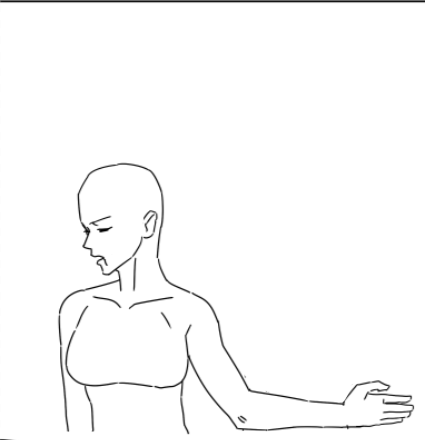

In [ ]:
final_dataset[0]['storyboard_image']

----------------------------------------

# Segmentation Masks - Visualizations and base setup

In [ ]:
from lang_sam import LangSAM
from lang_sam.utils import draw_image

In [ ]:
model = LangSAM()

/home/naman/miniconda3/envs/grounded-sam/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
Model loaded from /home/naman/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


In [ ]:
storyboard_path = '/mnt/data1/sabbih/datasets/dash-storyboards/storyboard/02314.webp'
final_path = '/mnt/data1/sabbih/datasets/dash-storyboards/final_image/02314.webp'

In [ ]:

image_1 = PIL.Image.open(storyboard_path).convert('RGB')
image_2 = PIL.Image.open(final_path).convert('RGB')

In [ ]:
stext_prompt = 'person'
ftext_prompt = 'person'

In [ ]:
masks1, boxes1, phrases1, logits1 = model.predict(image_1, stext_prompt)
masks2, boxes2, phrases2, logits2 = model.predict(image_2, ftext_prompt)

NameError: name 'model' is not defined

In [ ]:
masks1.shape, masks2.shape

NameError: name 'masks1' is not defined

In [ ]:
labels1 = [
        f"{phrase}, score: {logit:.2f}"
        for phrase, logit
        in zip(phrases1, logits1)
    ]

labels2 = [
        f"{phrase}, score: {logit:.2f}"
        for phrase, logit
        in zip(phrases2, logits2)
    ]

NameError: name 'phrases1' is not defined

In [ ]:
labels1, labels2

NameError: name 'labels1' is not defined

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

NameError: name 'masks1' is not defined

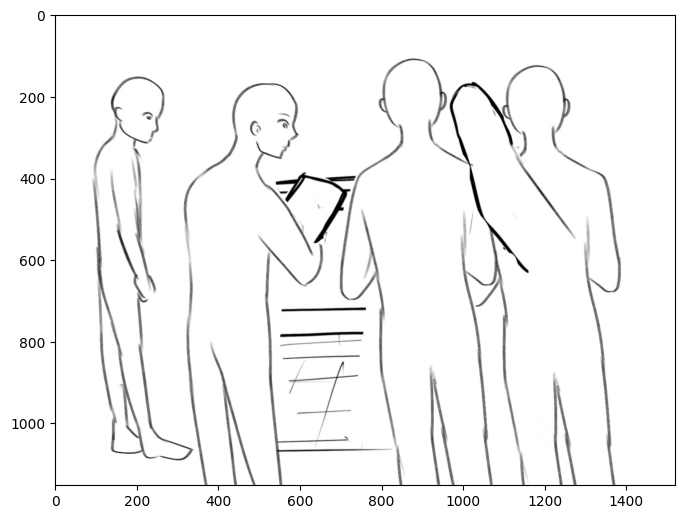

In [ ]:
plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.imshow(image_1)
for mask in masks1:
    show_mask(mask.cpu().numpy(), plt.gca(), random_color=False)
for box in boxes1:
    show_box(box.cpu().numpy(), plt.gca())
plt.axis('off')
plt.savefig('test.jpg', bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()

NameError: name 'masks2' is not defined

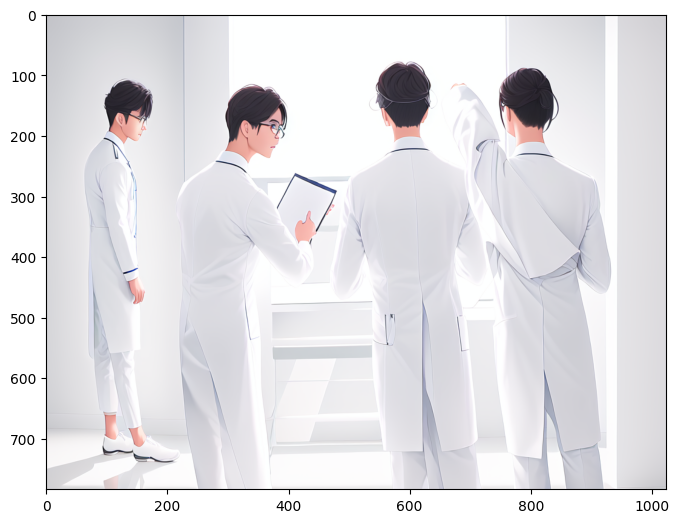

In [ ]:
plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
plt.imshow(image_2)
for mask in masks2:
    show_mask(mask.cpu().numpy(), plt.gca(), random_color=False)
for box in boxes2:
    show_box(box.cpu().numpy(), plt.gca())
plt.axis('off')
plt.savefig('test.jpg', bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()

In [ ]:
annotated_image1 = draw_image(np.array(image_1), masks1, boxes1, labels1)
annotated_image2 = draw_image(np.array(image_2), masks2, boxes2, labels2)


NameError: name 'draw_image' is not defined

In [ ]:
annotated_image1 = cv2.resize(annotated_image1, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
annotated_image2 = cv2.resize(annotated_image2, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

In [ ]:
pil_image1 = PIL.Image.fromarray(annotated_image1).convert('RGB')
pil_image2 = PIL.Image.fromarray(annotated_image2).convert('RGB')

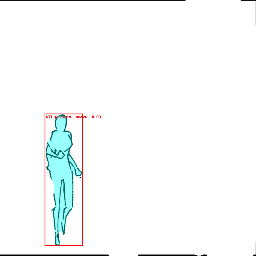

In [ ]:
pil_image1

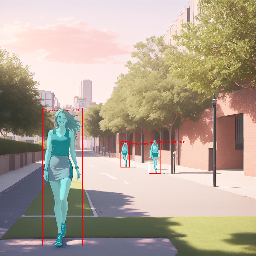

In [ ]:
pil_image2

In [ ]:
pil_image1.size, pil_image2.size

((256, 256), (256, 256))

In [ ]:
img = np.concatenate([annotated_image1, annotated_image2], axis = 1)

In [ ]:
pil_img = PIL.Image.fromarray(img).convert('RGB')
# pil_img = pil_img.resize((512, 512))

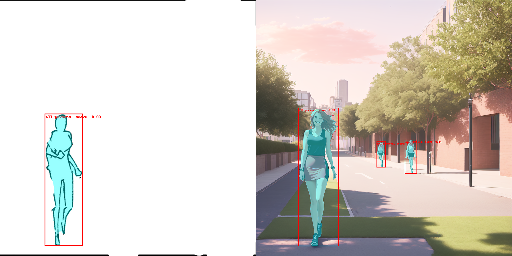

In [ ]:
pil_img

In [ ]:
pil_img.size

(512, 256)

# Final setup 

In [ ]:
model = LangSAM()
text_prompt = 'person'

final text_encoder_type: bert-base-uncased
Model loaded from /home/naman/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


In [ ]:
save_annotations = True
output_annotation_dir ='/mnt/data1/naman/projects/storyboard_cleanup/outputs/annotated_images_as_pair'
calculate_masks_overlap = True
resize_to_same_size = True
chunk_execution = True
save_in_batches = True
save_every = 100

overlap_threshold = 0.60
box_overlap_threshold = 0.65

In [ ]:
def get_dataframe(frame_path):

    df = pd.read_csv(frame_path)
    df["fname"] = df["fname"].apply(lambda x: str(x).zfill(5))
    return  df


def get_dataset(path):

    dataset = load_from_disk(path)
    return dataset

In [ ]:
def get_annotated_image(image, masks, boxes, phrases, logits):

    labels = [
        f"{phrase}, score: {logit:.2f}"
        for phrase, logit
        in zip(phrases, logits)
    ]

    annotated_image_array = draw_image(np.array(image), masks, boxes, labels)
    annotated_image_array = cv2.resize(annotated_image_array, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

    pil_image = PIL.Image.fromarray(annotated_image_array).convert('RGB')

    return pil_image, annotated_image_array

In [ ]:
def get_single_annotated_image(storyboard_annotated_image_array, final_annotated_image_array):
    
    img = np.concatenate([storyboard_annotated_image_array, final_annotated_image_array], axis = 1)
    pil_img = PIL.Image.fromarray(img).convert('RGB')
    return pil_img

In [ ]:
def get_predictions(model, image, prompt):

    masks, boxes, phrases, logits = model.predict(image, prompt)
    return masks, boxes, phrases, logits

In [ ]:
def get_mask_overlap_score(mask1, mask2):

    binary_mask1 = mask1.numpy().astype(np.uint8)
    binary_mask2 = mask2.numpy().astype(np.uint8)

    # binary_mask1 = cv2.resize(binary_mask1, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
    # binary_mask2 = cv2.resize(binary_mask2, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)

    intersection = np.logical_and(binary_mask1, binary_mask2).sum()
    union = np.logical_or(binary_mask1, binary_mask2).sum()

    if union == 0:
        return 0.0

    iou = intersection / union

    return iou

In [ ]:
def get_box_overlap_score(box1, box2):

    # Calculate intersection area
    x_intersection = max(0, min(box1[2], box2[2]) - max(box1[0], box2[0]))
    y_intersection = max(0, min(box1[3], box2[3]) - max(box1[1], box2[1]))
    intersection_area = x_intersection * y_intersection

    # Calculate union area
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = area_box1 + area_box2 - intersection_area

    # Calculate IoU
    iou = intersection_area / max(union_area, 1e-10)  # Avoid division by zero

    return iou


In [ ]:
def masks_overlaping_calculations(storyboard_masks, final_masks, storyboard_boxes, final_boxes):

    s2f = {}
    s2f_box = {}
    multi_smask_mapping = 0
    multi_sbox_mapping = 0
    s2f_overlaps = 0

    overlap_scores = []
    box_overlap_scores = []

    for sidx, storyboard_mask in enumerate(storyboard_masks):
        multi_map = 0
        box_multimap = 0
        box_global_multimap = False
        global_multimap = False
        for fidx, final_mask in enumerate(final_masks):
            overlap_score = get_mask_overlap_score(storyboard_mask, final_mask) 
            # print('mask', type(overlap_score), overlap_score)
            if overlap_score >= overlap_threshold:
                overlap_scores.append(overlap_score)
                s2f_overlaps+=1
                if storyboard_mask in s2f:
                    multi_map+=1
                    if multi_map > 1:
                        global_multimap = True
                else:
                    s2f[storyboard_mask] = final_mask
            else:
                box_overlap_score = get_box_overlap_score(storyboard_boxes[sidx], final_boxes[fidx])
                # print('box', type(np.float64(box_overlap_score.item())), box_overlap_score)
                if box_overlap_score >= box_overlap_threshold:
                    box_overlap_scores.append(np.float64(box_overlap_score.item()))
                    s2f_overlaps+=1
                    if sidx in s2f_box:
                        box_multimap+=1
                        if box_multimap > 1:
                            box_global_multimap = True
                    else:
                        s2f_box[sidx] = fidx
                # else:
                #     box_overlap_scores.append(-1)
                # overlap_scores.append(-1)
        if global_multimap:
            multi_smask_mapping+=1
        if box_global_multimap:
            multi_sbox_mapping+=1

    return s2f_overlaps, multi_smask_mapping, multi_sbox_mapping, overlap_scores, box_overlap_scores


In [ ]:
save_annotations = True
output_annotation_dir ='/mnt/data1/naman/projects/storyboard_cleanup/outputs/annotated_images_as_pair'

In [ ]:
calculate_masks_overlap = True
resize_to_same_size = True

In [ ]:
def execute(dataset, model, storyboard_prompt, final_prompt, df, output_json = None, file_output_path = None):

    num_storyboard_masks, num_final_masks = [], []
    num_multimaps_s2f, num_multimaps_s2f_box = [], []
    s2f_total_overlaps = []
    all_overlap_scores, all_box_overlap_scores = [], []
    f_names = []

    fname_set = {}
    if save_in_batches:
        if len(output_json) > 0:
            fname_set = set(pd.DataFrame(output_json).f_name.tolist())

    for idx, sample in enumerate(tqdm(dataset)):

        fname = sample["fname"]

        if save_in_batches:
            if fname in fname_set:
                continue

        f_names.append(fname)
        storyboard_image = sample['storyboard_image']
        final_image = sample['final_image']

        caption = sample['caption']
        
        if resize_to_same_size:
            storyboard_image = PIL.Image.fromarray(cv2.resize(np.array(storyboard_image), 
                                                            dsize = (800, 800), 
                                                            interpolation=cv2.INTER_CUBIC)).convert('RGB')
            final_image = PIL.Image.fromarray(cv2.resize(np.array(final_image), 
                                                            dsize = (800, 800), 
                                                            interpolation=cv2.INTER_CUBIC)).convert('RGB')

        storyboard_masks, storyboard_boxes, storyboard_phrases, storyboard_logits = get_predictions(model, 
                                                                                                    storyboard_image,
                                                                                                    storyboard_prompt)
        final_masks, final_boxes, final_phrases, final_logits = get_predictions(model,
                                                                                final_image,
                                                                                final_prompt)

        ## annotate images with bounding boxes and segmentation 
        if save_annotations:
            _, storyboard_annotated_image_array = get_annotated_image(storyboard_image,
                                                                    storyboard_masks,
                                                                    storyboard_boxes,
                                                                    storyboard_phrases,
                                                                    storyboard_logits)
            
            _, final_annotated_image_array = get_annotated_image(final_image,
                                                                final_masks,
                                                                final_boxes,
                                                                final_phrases,
                                                                final_logits)
            ## save the annotated storyboard and final image as a single image
            final_single_annotated_image = get_single_annotated_image(storyboard_annotated_image_array, final_annotated_image_array)
            final_single_annotated_image.save(f"{output_annotation_dir}/{fname}.jpg")

        num_storyboard_masks.append(storyboard_masks.shape[0])
        num_final_masks.append(final_masks.shape[0])

        if calculate_masks_overlap:
            s2f_overlaps, num_multi_maps_s2f, num_multi_maps_s2f_box, overlap_scores, box_overlap_scores  = masks_overlaping_calculations(
                                                                                                    storyboard_masks, 
                                                                                                    final_masks,
                                                                                                    storyboard_boxes,
                                                                                                    final_boxes
                                                                                                    ) 
            num_multimaps_s2f.append(num_multi_maps_s2f)
            num_multimaps_s2f_box.append(num_multi_maps_s2f_box)
            s2f_total_overlaps.append(s2f_overlaps)
            all_overlap_scores.append(overlap_scores)
            all_box_overlap_scores.append(box_overlap_scores)

        if save_in_batches:
            output_dict = {
                'f_name': fname,
                'num_storyboard_masks': storyboard_masks.shape[0],
                'num_final_masks': final_masks.shape[0],
                'difference_in_num_of_masks': storyboard_masks.shape[0] - final_masks.shape[0],
                'total_overalps_s2f': s2f_overlaps,
                'num_multimaps_s2f': num_multi_maps_s2f,
                'num_multimaps_s2f_box': num_multi_maps_s2f_box,
                'overlap_scores': overlap_scores,
                'box_overlap_scores': box_overlap_scores,
            }
            output_json.extend([output_dict])
            if (idx + 1) % save_every == 0:
                with open(file_output_path, 'w') as fp:
                    json.dump(output_json, fp, indent = 3)
                print(f'output json updated by {save_every} more rows..!')

        # if idx>=23:
        #     break

    if save_in_batches:
        with open(file_output_path, 'w') as fp:
            json.dump(output_json, fp, indent = 3)
        print('output json file updated')

    # print(num_storyboard_masks)
    # print(num_final_masks)
    # print(s2f_total_overlaps)
    # print(num_multimaps_s2f)
    # print(num_multimaps_s2f_box)
    # print(all_overlap_scores)
    # print(all_box_overlap_scores)
    # sys.exit(0)

    if chunk_execution:
        df_chunk = pd.DataFrame()
        df_chunk['fname'] = f_names
        df_chunk['num_storyboard_masks'] = num_storyboard_masks
        df_chunk['num_final_masks'] = num_final_masks
        df_chunk['difference_in_num_of_masks'] = df_chunk['num_storyboard_masks'] - df_chunk['num_final_masks']
        df_chunk['total_overalps_s2f'] = s2f_total_overlaps     
        df_chunk['num_multimaps_s2f'] = num_multimaps_s2f
        df_chunk['num_multimaps_s2f_box'] = num_multimaps_s2f_box
        df_chunk['overlap_scores'] = all_overlap_scores
        df_chunk['box_overlap_scores'] = all_box_overlap_scores
    else:
        df['num_storyboard_masks'] = num_storyboard_masks
        df['num_final_masks'] = num_final_masks
        df['difference_in_num_of_masks'] = df['num_storyboard_masks'] - df['num_final_masks']
        df['total_overalps_s2f'] = s2f_total_overlaps     
        df['num_multimaps_s2f'] = num_multimaps_s2f
        df['num_multimaps_s2f_box'] = num_multimaps_s2f_box
        df['overlap_scores'] = all_overlap_scores
        df['box_overlap_scores'] = all_box_overlap_scores

    if save_in_batches and chunk_execution:
        return df_chunk, 'fail_safe'
    if chunk_execution:
        return df_chunk, 'none'
    return df, 'none'

In [ ]:
def main(args):

    dataframe_path = '/mnt/data1/naman/projects/storyboard_cleanup/data/storyboard_master_data_2.csv'
    dataset_path = f'/mnt/data1/naman/projects/storyboard_cleanup/data/storyboard_hf_dataset_chunks_54753/storyboard_hf_dataset_chunk_{args.chunk}'
    dataframe_output_path = '/mnt/data1/naman/projects/storyboard_cleanup/outputs'

    # dist.init_process_group('nccl')

    model = LangSAM()
    storyboard_text_prompt = 'person'
    final_text_prompt = 'person'

    print(dataset_path)

    df = get_dataframe(dataframe_path)
    dataset = get_dataset(dataset_path)

    if chunk_execution:
        file_output_path = f"{dataframe_output_path}/hf_storyboard_dataset_output_chunk_{dataset_path.split('_')[-1]}.json"
    else:
        file_output_path = f"{dataframe_output_path}/hf_stroyboard_dataset_output.json"

    if not os.path.exists(file_output_path):
        with open(file_output_path, 'w') as fp:
            json.dump([], fp, indent=3)
    with open(file_output_path, 'r') as fp:
        output_json = json.load(fp)
    print('output json file loaded')

    df_final, failsafe = execute(dataset, model, storyboard_text_prompt, final_text_prompt, df, output_json, file_output_path)

    if failsafe != 'fail_safe':
        df_final.to_json(file_output_path, orient='records', compression='infer')
        print('output file saved.')
    else:
        df_final.to_json(f"{file_output_path.split('.')[0]}_fail_safe.json", orient='records', compression='infer')
        print('fail_safe output file saved')


  0%|          | 0/54753 [00:00<?, ?it/s]/home/naman/miniconda3/envs/grounded-sam/lib/python3.10/site-packages/transformers/modeling_utils.py:907: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/naman/miniconda3/envs/grounded-sam/lib/python3.10/site-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/naman/miniconda3/envs/grounded-sam/lib/python3.10/site-packages/torch/utils/checkpoint.py:61: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
  0%|          | 10/54753 [00:17<26:38:30,  1.75s/it]


# Post Output Analysis

In [55]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

In [22]:
annotated_images_path = '/mnt/data1/naman/projects/storyboard_cleanup/outputs/annotated_images_as_pair'

In [23]:
def display_image(image_id):
    image = PIL.Image.open(f"{annotated_images_path}/{image_id}.jpg").convert('RGB')
    return image

In [40]:
dfm = pd.read_csv('/mnt/data1/naman/projects/storyboard_cleanup/data/storyboard_master_data_2.csv')
dfm["fname"] = dfm["fname"].apply(lambda x: str(x).zfill(5))

In [41]:
dfm

,fname,storyboard_image,final_image,caption
0,00001,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Emily Smith Caucasian, Young Adult, Female, Bl..."
1,00004,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Chinmay Misc Old Female, Eyes closed, Gray Hai..."
2,00010,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Grace Williams Female, Adult, Red Hair, wearin..."
3,00015,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Abby Misc Young Female, Eyes closed, Blonde Lo..."
4,00017,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,Grace Adult Caucasian Female with Blonde hair ...
...,...,...,...,...
54748,94568,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"low angle shot of man holding girl hand, even..."
54749,94569,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,Jake Young Adult Latin American Male with Blac...
54750,94570,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,side profile of Ashley Young Adult Caucasian F...
54751,94571,/mnt/data1/sabbih/datasets/dash-storyboards/st...,/mnt/data1/sabbih/datasets/dash-storyboards/fi...,"Dan Misc Adult male, Black Eyes, Brown Hair, w..."


In [24]:
file_path1 = '/mnt/data1/naman/projects/storyboard_cleanup/outputs/hf_storyboard_dataset_output_chunk_1_fail_safe.json'
file_path2 = '/mnt/data1/naman/projects/storyboard_cleanup/outputs/hf_storyboard_dataset_output_chunk_2_fail_safe.json'
file_path3 = '/mnt/data1/naman/projects/storyboard_cleanup/outputs/hf_storyboard_dataset_output_chunk_3_fail_safe.json'
file_path4 = '/mnt/data1/naman/projects/storyboard_cleanup/outputs/hf_storyboard_dataset_output_chunk_4_fail_safe.json'

In [25]:
df1 = pd.read_json(file_path1)
df2 = pd.read_json(file_path2)
df3 = pd.read_json(file_path3)
df4 = pd.read_json(file_path4)

In [26]:
df1["fname"] = df1["fname"].apply(lambda x: str(x).zfill(5))
df2["fname"] = df2["fname"].apply(lambda x: str(x).zfill(5))
df2["fname"] = df2["fname"].apply(lambda x: str(x).zfill(5))
df2["fname"] = df2["fname"].apply(lambda x: str(x).zfill(5))

In [27]:
df1

,fname,num_storyboard_masks,num_final_masks,difference_in_num_of_masks,total_overlaps_s2f,num_multimaps_s2f,num_multimaps_s2f_box,overlap_scores,box_overlap_scores,sf_map_info
0,00001,1,1,0,1,0,0,[0.8353457579],[],"{'0': [[0], []]}"
1,00004,1,4,-3,1,0,0,[],[0.8179516792],"{'0': [[], [0]]}"
2,00010,1,3,-2,1,0,0,[0.6821112969],[],"{'0': [[0], []]}"
3,00015,1,1,0,1,0,0,[],[0.9602882266],"{'0': [[], [0]]}"
4,00017,1,1,0,1,0,0,[0.8166277279],[],"{'0': [[0], []]}"
...,...,...,...,...,...,...,...,...,...,...
13695,29992,1,1,0,1,0,0,[],[0.9442654252],"{'0': [[], [0]]}"
13696,29993,1,1,0,1,0,0,[0.9177310954000001],[],"{'0': [[0], []]}"
13697,29994,1,1,0,1,0,0,[0.8743546939],[],"{'0': [[0], []]}"
13698,29995,1,1,0,1,0,0,[0.7597103763],[],"{'0': [[0], []]}"


##### custom alignment score

In [28]:
def misalignment_penalization_score(mapping_graph, a):
    penalty = np.abs(a)
    fmap_freq = {}

    for _, map_list in mapping_graph.items():
        mlist = map_list[0]
        blist = map_list[1]

        l1 = len(mlist)
        l2 = len(blist)

        if l1==0 and l2==0:
            penalty += 1
        else:
            for item in mlist:
                if item in fmap_freq:
                    fmap_freq[item] += 1
                else:
                    fmap_freq[item] = 1
            for item in blist:
                if item in fmap_freq:
                    fmap_freq[item] += 1
                else:
                    fmap_freq[item] = 1

            penalty += (l1+l2-1)

    for freq in fmap_freq.values():
        penalty += (freq - 1)

    return penalty  

In [29]:
df1['penalty'] = df1.apply(lambda row: misalignment_penalization_score(row['sf_map_info'], row['difference_in_num_of_masks']), axis = 1)
df2['penalty'] = df2.apply(lambda row: misalignment_penalization_score(row['sf_map_info'], row['difference_in_num_of_masks']), axis = 1)
df3['penalty'] = df3.apply(lambda row: misalignment_penalization_score(row['sf_map_info'], row['difference_in_num_of_masks']), axis = 1)
df4['penalty'] = df4.apply(lambda row: misalignment_penalization_score(row['sf_map_info'], row['difference_in_num_of_masks']), axis = 1)

In [30]:
df1s = df1.sort_values(by = 'penalty', ascending=True)
df2s = df2.sort_values(by = 'penalty', ascending=True)
df3s = df3.sort_values(by = 'penalty', ascending=True)
df4s = df4.sort_values(by = 'penalty', ascending=True)

In [56]:
df1s

,fname,num_storyboard_masks,num_final_masks,difference_in_num_of_masks,total_overlaps_s2f,num_multimaps_s2f,num_multimaps_s2f_box,overlap_scores,box_overlap_scores,sf_map_info,penalty
17,00081,1,1,0,1,0,0,[0.6868914298000001],[],"{'0': [[0], []]}",0
18,00084,1,1,0,1,0,0,[0.8492938086],[],"{'0': [[0], []]}",0
20,00090,1,1,0,1,0,0,[0.6166147456000001],[],"{'0': [[0], []]}",0
21,00093,0,0,0,0,0,0,[],[],{},0
22,00099,1,1,0,1,0,0,[0.6668988039],[],"{'0': [[0], []]}",0
...,...,...,...,...,...,...,...,...,...,...,...
7924,17398,10,22,-12,0,0,0,[],[],"{'0': [[], []], '1': [[], []], '2': [[], []], ...",22
8423,18020,2,24,-22,2,0,0,"[0.8508778442, 0.8155592638]",[],"{'0': [[8], []], '1': [[0], []]}",22
6135,15239,10,35,-25,8,0,0,"[0.8800470759000001, 0.8773267151, 0.940601128...",[],"{'0': [[14], []], '1': [[27], []], '2': [[1], ...",27
2369,08361,8,42,-34,0,0,0,[],[],"{'0': [[], []], '1': [[], []], '2': [[], []], ...",42


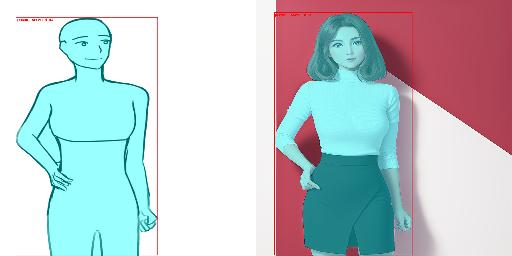

In [32]:
display_image('00084')

<Axes: xlabel='penalty', ylabel='count'>

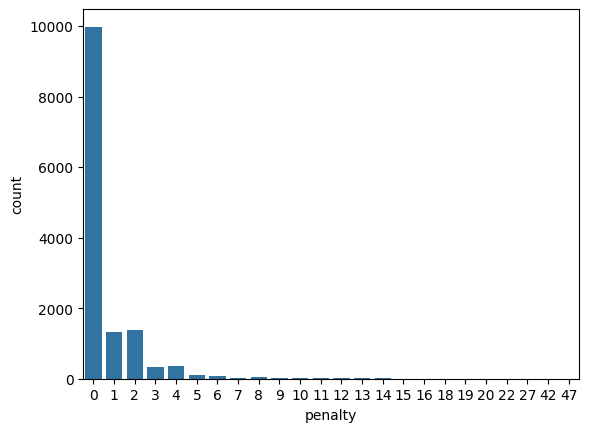

In [33]:
sns.countplot(x = df1s['penalty'])

<Axes: xlabel='penalty', ylabel='Count'>

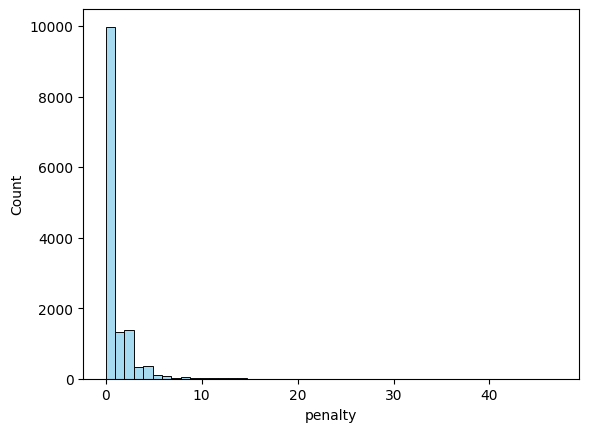

In [34]:
data = df1s['penalty']
sns.histplot(data, bins=max(data)-min(data)+1, kde=False, color='skyblue')

<Axes: xlabel='penalty', ylabel='Density'>

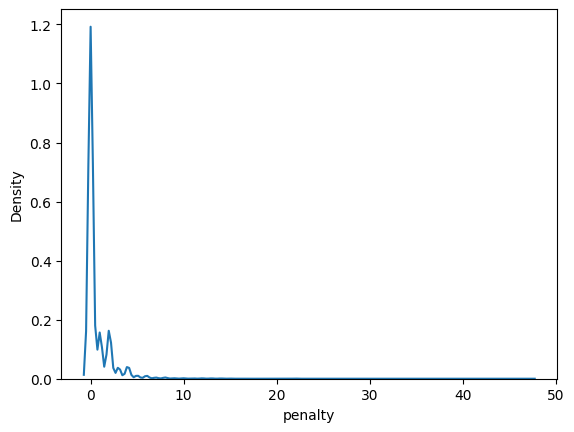

In [35]:
sns.kdeplot(df1s['penalty'])

<Axes: xlabel='penalty', ylabel='Count'>

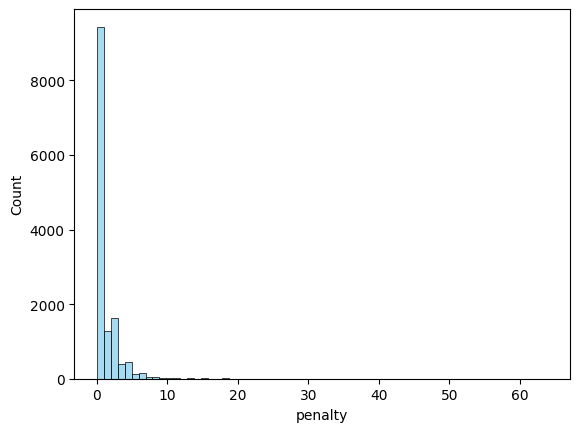

In [57]:
data = df2s['penalty']
sns.histplot(data, bins=max(data)-min(data)+1, kde=False, color='skyblue')

<Axes: xlabel='penalty', ylabel='count'>

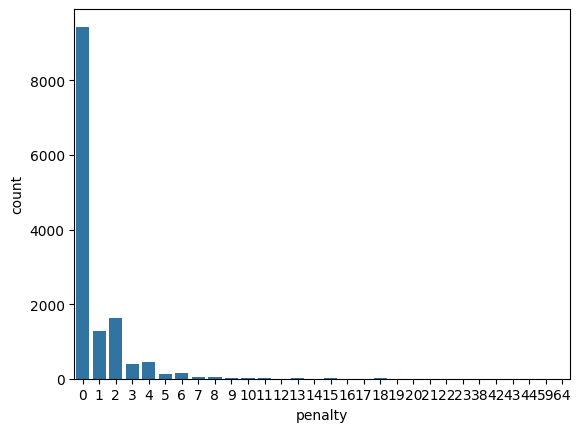

In [60]:
sns.countplot(x = df2s['penalty'])

<Axes: xlabel='penalty', ylabel='Count'>

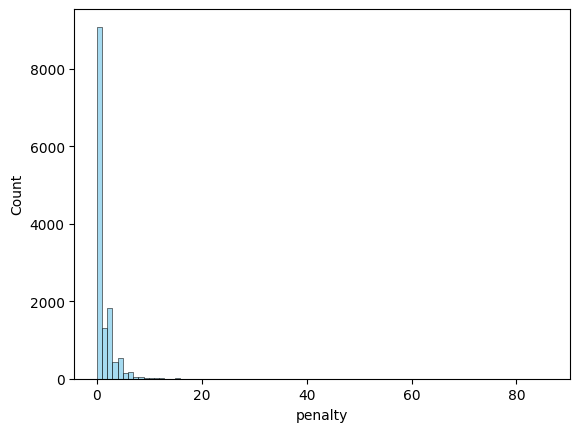

In [58]:
data = df3s['penalty']
sns.histplot(data, bins=max(data)-min(data)+1, kde=False, color='skyblue')

<Axes: xlabel='penalty', ylabel='count'>

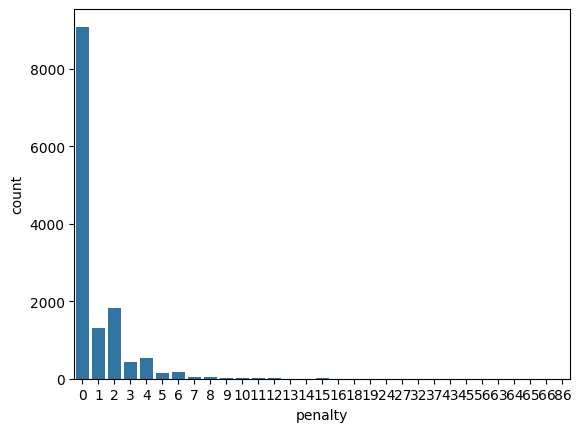

In [61]:
sns.countplot(x = df3s['penalty'])

<Axes: xlabel='penalty', ylabel='Count'>

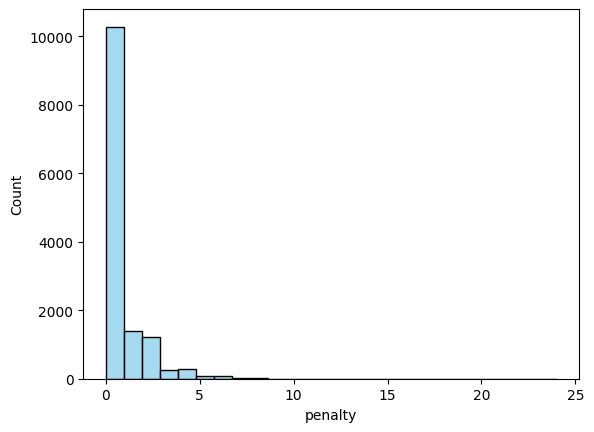

In [59]:
data = df4s['penalty']
sns.histplot(data, bins=max(data)-min(data)+1, kde=False, color='skyblue')

<Axes: xlabel='penalty', ylabel='count'>

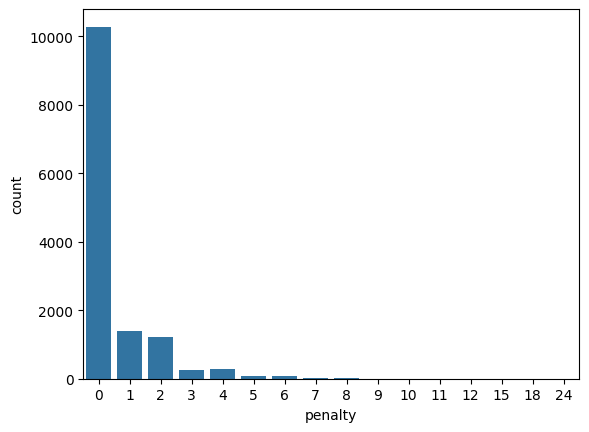

In [63]:
sns.countplot(x = df4s['penalty'])

In [64]:
len(df1s[df1s['penalty'] <=0]), len(df2s[df2s['penalty'] <=0]), len(df3s[df3s['penalty'] <=0]), len(df4s[df4s['penalty'] <=0])

(9981, 9439, 9085, 10279)

In [ ]:
dfm1 = dfm[dfm.fname.isin(df1.fname)].reset_index(dr)

# Misc

In [ ]:
import numpy as np

def calculate_iou(mask1, mask2):
    # Convert the masks to binary arrays (1 for foreground, 0 for background)
    binary_mask1 = (mask1 > 0).astype(np.uint8)
    binary_mask2 = (mask2 > 0).astype(np.uint8)

    # binary_mask1 = mask1.astype(np.uint8)
    # binary_mask2 = mask2.astype(np.uint8)

    binary_mask1 = cv2.resize(binary_mask1, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
    binary_mask2 = cv2.resize(binary_mask2, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)

    # Calculate intersection and union
    intersection = np.logical_and(binary_mask1, binary_mask2).sum()
    union = np.logical_or(binary_mask1, binary_mask2).sum()

    # Avoid division by zero
    if union == 0:
        return 0.0

    # Calculate IoU
    iou = intersection / union

    return iou

# # Example usage
# mask1 = np.array([[0, 1, 0],
#                   [1, 1, 1],
#                   [0, 1, 0]])

# mask2 = np.array([[1, 0, 0],
#                   [1, 1, 1],
#                   [0, 0, 0]])

# iou = calculate_iou(mask1, mask2)
# print("IoU:", iou)


In [ ]:
calculate_iou(masks1[0].numpy(), masks2[2].numpy())

0.0

In [ ]:
calculate_iou(masks1[0].numpy(), masks2[0].numpy())

0.6541008254423435

In [ ]:
binary_mask1 = (masks1[0].numpy() > 0).astype(np.uint8)

In [ ]:
binary_mask1 = masks1[0].numpy().astype(np.uint8)
binary_mask2 = masks2[0].numpy().astype(np.uint8)

In [ ]:
binary_mask1 = cv2.resize(binary_mask1, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
binary_mask2 = cv2.resize(binary_mask2, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)

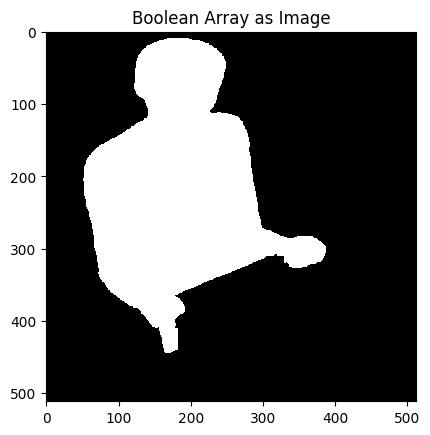

In [ ]:
plt.imshow(binary_mask1, cmap='gray', interpolation='nearest')
plt.title("Boolean Array as Image")
plt.show()


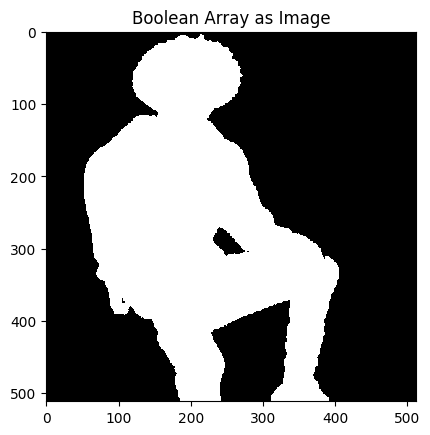

In [ ]:
plt.imshow(binary_mask2, cmap='gray', interpolation='nearest')
plt.title("Boolean Array as Image")
plt.show()


In [ ]:
for idx, i in enumerate(tqdm([1,2,3,4,5,6,7])):
    continue

100%|██████████| 7/7 [00:00<00:00, 103017.99it/s]


In [ ]:
cnt = 0
for idx, sample in enumerate(tqdm(final_dataset[:5])):
    print(sample[0])
    cnt+=1
    if cnt>=5:
        break

100%|██████████| 3/3 [00:00<00:00, 60205.32it/s]

s
f
c


In [ ]:
final_dataset[:5]

{'storyboard_image': [<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=474x487>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=425x440>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=1289x1499>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=228x749>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=1075x1218>],
 'final_image': [<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=992x1024>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=992x1024>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=880x1024>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=304x1024>,
  <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=896x1024>],
 'caption': ['Kelly (SB2) Adult, Female, blue sleeveless mini gown, evening, garden area (angry:1)',
  'Emily Smith Caucasian, Young Adult, Female, Black Hair, Eyes closed, Short Hair with Bangs, mouth bleeding, profile face turn, wearing a red sleeveless dress, hand',
  'Dark blue s

In [ ]:
df.storyboard_image[0].split('/')[-1].split('.')[0]

'00000'

In [ ]:
for final_mask in masks2:
    print(type(final_mask.numpy().astype(np.uint8)))

NameError: name 'masks2' is not defined